In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torchvision.models import VGG16_BN_Weights
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter, saps_imagenet_real_scatter

# load pre-trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vgg16_bn(weights=VGG16_BN_Weights.IMAGENET1K_V1).to(device)

#  Reprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=4)

model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Before temperature - NLL: 1.240, ECE: 0.033
Optimal temperature: 1.026
After temperature - NLL: 1.238, ECE: 0.028


APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9632 ± 0.0011
Final Average Prediction Set Size: 24.73 ± 0.60
Final Average Coverage: 0.9489 ± 0.0014
Final Average Real Probability: 0.8911 ± 0.0024


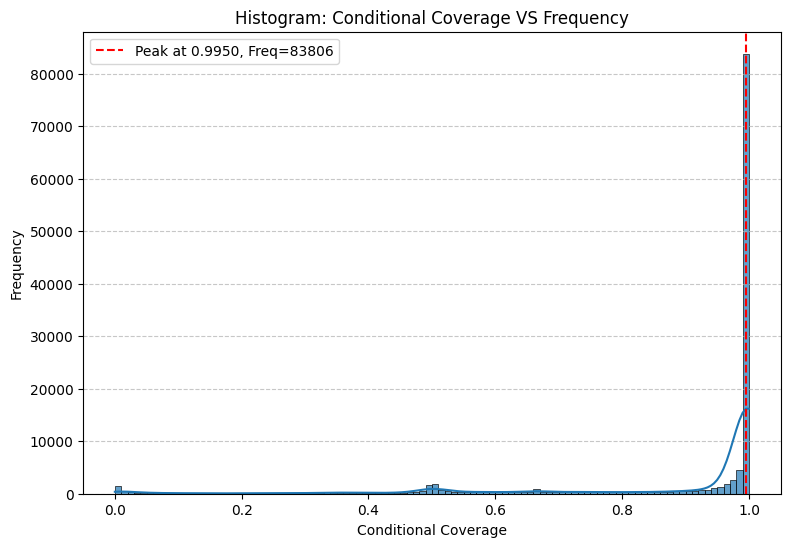

83806 (67.39%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1599 ± 0.0116
Final Average Prediction Set Size: 8.73 ± 0.29
Final Average Coverage: 0.9500 ± 0.0016
Final Average Real Probability: 0.8740 ± 0.0035


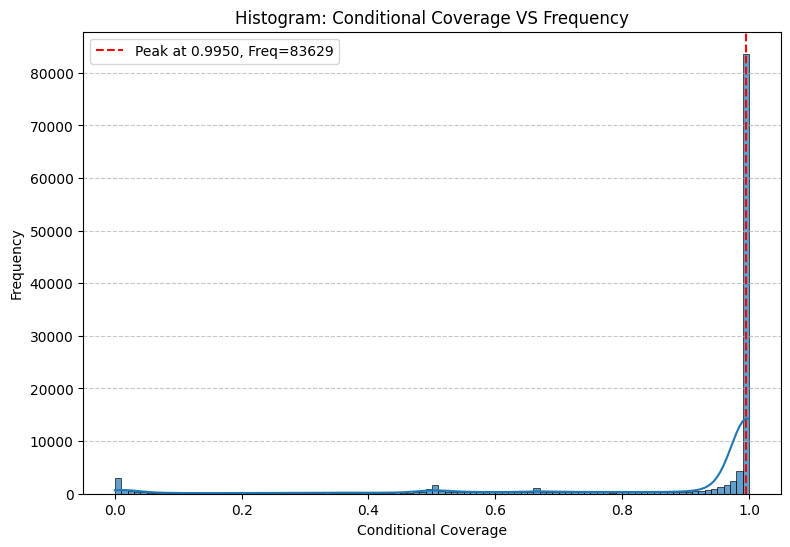

83629 (67.25%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.05, k_reg=5, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0286 ± 0.0074
Final Average Prediction Set Size: 6.79 ± 0.15
Final Average Coverage: 0.9497 ± 0.0018
Final Average Real Probability: 0.8739 ± 0.0040


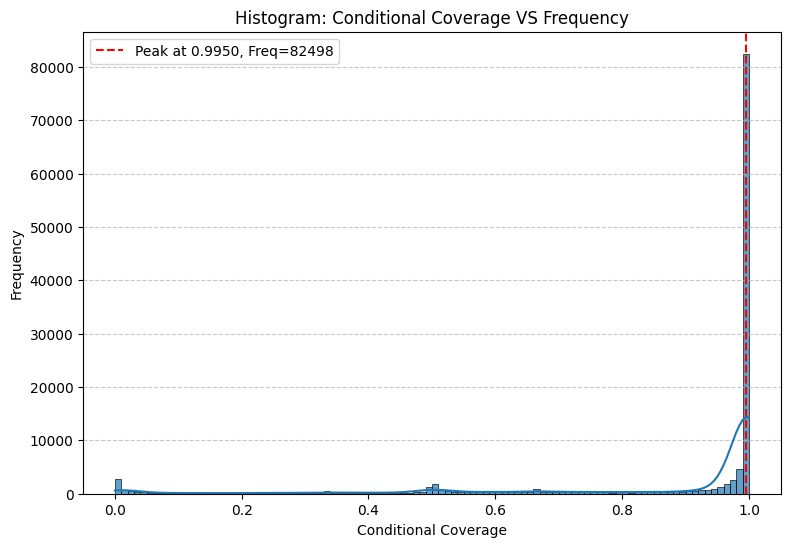

82498 (66.34%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.05, num_runs=10, alpha=0.05, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9629 ± 0.0011
Final Average Prediction Set Size: 24.50 ± 0.58
Final Average Coverage: 0.9489 ± 0.0014
Final Average Real Probability: 0.8912 ± 0.0023


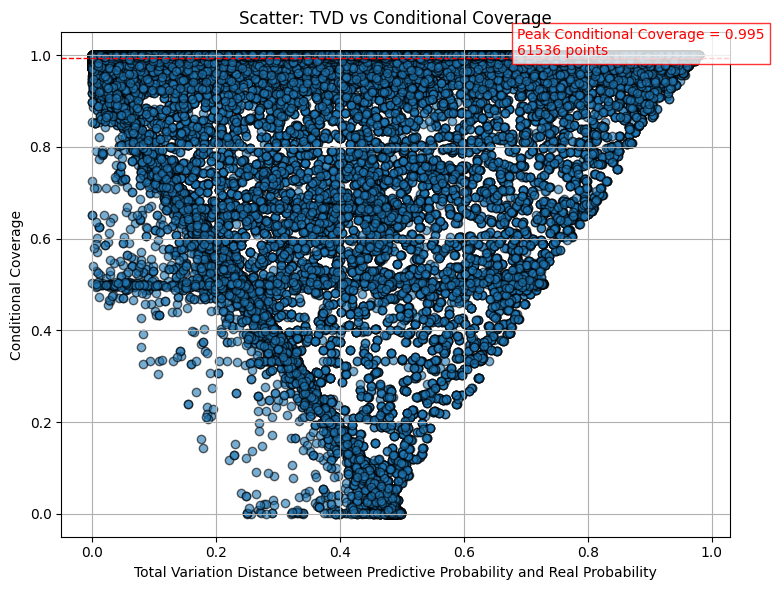

Peak Conditional Coverage = 0.995, with 61536 samples

=== Count Regions Summary ===
42430 (34.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
38319 (30.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
22855 (18.4%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.97795']
  Real Probability Set      : ['0.99926']
Sample 2:
  Predictive Probability Set: ['0.94569', '0.04209']
  Real Probability Set      : ['0.99385', '0.00058']
Sample 3:
  Predictive Probability Set: ['0.99995']
  Real Probability Set      : ['0.99957']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.39294', '0.34387', '0.13813', '0.03603', '0.02525', '0.01833', '0.00911']
  Real Probability Set      : ['0.02360', '0.02360', '0.02360', '0.02633', '0.00000', '0.02360', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.49245', '0.37154', '0.07370', '

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1573 ± 0.0142
Final Average Prediction Set Size: 8.60 ± 0.35
Final Average Coverage: 0.9501 ± 0.0021
Final Average Real Probability: 0.8737 ± 0.0042


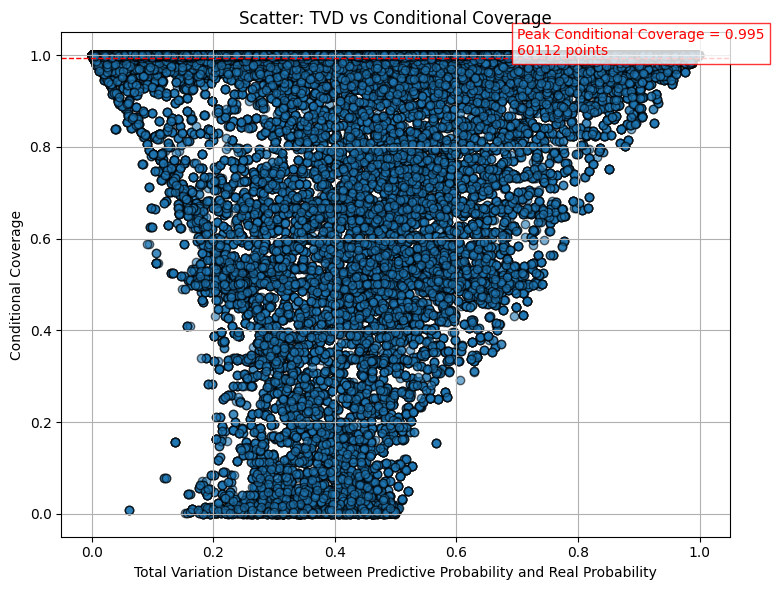

Peak Conditional Coverage = 0.995, with 60112 samples

=== Count Regions Summary ===
42270 (34.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
36379 (29.3%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
24881 (20.0%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.52472', '0.43056', '0.03175', '0.00851', '0.00154', '0.00079', '0.00068']
  Real Probability Set      : ['0.50280', '0.49661', '0.00021', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.95773', '0.02756', '0.00842', '0.00619', '0.00010', '0.00000', '0.00000', '0.00000']
  Real Probability Set      : ['0.96737', '0.00103', '0.00103', '0.02954', '0.00103', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.82396', '0.15980', '0.01023', '0.00446', '0.00054', '0.00016', '0.00011']
  Real Probability Set      : ['0.74042', '0.24891', '0

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, k_reg=5, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0255 ± 0.0062
Final Average Prediction Set Size: 6.72 ± 0.12
Final Average Coverage: 0.9496 ± 0.0017
Final Average Real Probability: 0.8738 ± 0.0034


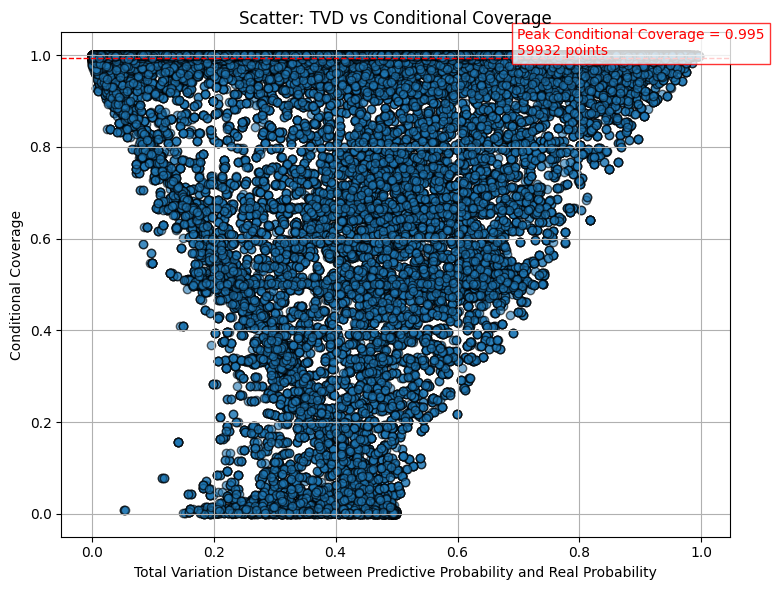

Peak Conditional Coverage = 0.995, with 59932 samples

=== Count Regions Summary ===
42687 (34.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
36470 (29.3%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
25122 (20.2%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.99790']
  Real Probability Set      : ['0.99906']
Sample 2:
  Predictive Probability Set: ['0.99224', '0.00643']
  Real Probability Set      : ['0.99913', '0.00043']
Sample 3:
  Predictive Probability Set: ['0.58633', '0.41116', '0.00118', '0.00080', '0.00008', '0.00008', '0.00005', '0.00004', '0.00003']
  Real Probability Set      : ['0.52851', '0.47131', '0.00018', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.30703', '0.24103', '0.22180', '0.16461', '0.02120', '0.00977', '0.00974', '0.0057

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, num_runs=10, alpha=0.05)